# Estimating unknown quantities from a sample

descriptive statistics: concisely summarise what we do know<br> 
inferential statistics: learn what we do not know from what we do know<br> 

two big ideas: **estimation** and **hypothesis testing**<br> 

## Samples, populations, and sampling

**Sampling theory** - general assumptions about the data. "If probability theory is the foundations upon which all statistical theory builds, sampling theory is the frame around which you can build the rest of the house".

We can't possibly do experiments with every person in teh world, so we need to take a **sample** of the population and make inferences from that sample.<br> 

**Defining a population**<br> 

all possible observations of the thing you want to draw conclusions about (usually *Much* bigger than the sample)<br> 

Usually, its not obvious what the population is.<br> 

**Simple random samples**<br> 
The sample is a subset of the population. We want to use the sample to draw inferences about the population. The relationship between the two is described by the **sampling method**<br> 

**Simple random sample** - a procedure in which every member of the population has the same chance of being selected. 

**Without replacement** - can't obsverve the same thing twice. 

**with replacement** - put samples back after we observe them. 

IF the population of interest is large, there is little difference between sampling with and without replacement.<br> 

**Most samples are not simple random samples**<br> 

other methods<br> 
- stratified sampling - random sample from several subpopulations. aka oversampling b/c it attempts to over-represent rare groups
- snowball sampling - have participants give contact info of other potential partipants.
    - gets data in situations where it might be impossible to get any
    - sample is highly non-random
    - can be unethical if not handled well
- convenience sampling - samples chosen in a way that is convenient to the researcher (snowball is one type).


**How much does it matter if you don't have a simple random sample?**<br> 
Sometimes, it's deliberate to help the study (e.g. stratified sampling)- there are other statistical tools to help adjust for introduced biases (not covered here)<br> 
Sometimes you just can't help it and have to go for some kind of convenience sampling.<br> 

**Population parameters from sample statistics**<br> 

**population parameters** - characteristics of an entire population<br> 
**sample statistics** - properties of the dataset<br> 

we calculate sample statistics to learn population parameters.<br> 

## The law of large numbers

simulate administering 10000 IQ tests

In [1]:
IQ <- rnorm(n=10000, mean=100, sd=15)
IQ <- round(IQ)

paste("mean: ", mean(IQ))
paste("sd: ", sd(IQ))

[1] "mean:  100.0865"

[1] "sd:  15.0031305780732"

**The more data you collect, the better the sample statistics can be used to approximate population parameters**

As the number of samples gets larger, the sample mean tends to get closer to the true population mean. As $N \rightarrow \infty$, $\bar{X} \rightarrow \mu$

## Sampling distributions and the central limit theorem

**Sampling distribution of the mean**<br> 

measure the IQ of 5 people twice

In [2]:
IQ.1 <- round(rnorm(n=5, mean=100, sd=15))
IQ.2 <- round(rnorm(n=5, mean=100, sd=15))

keep doing this over and over again and record the sample mean for each of the 5 groups. 

We end up with a **Distribution of sample means**<br>

**Sampling distributions exist for any sample statistic!**<br> 
ex: we could write down the largest of the 5 for each experiment<br> 
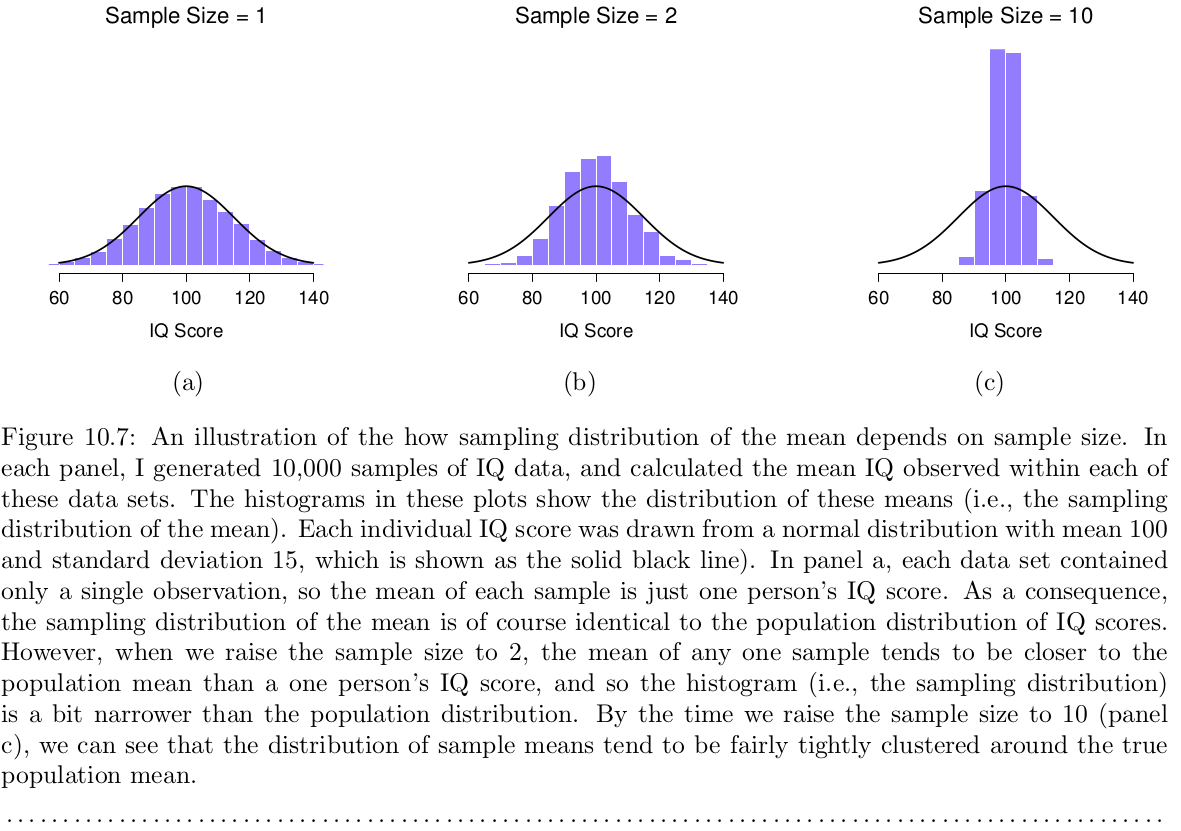

**The central limit theorem**<br> 

**Standard Error (SE)** - the standard deviation of the sampling distribution<br> 
**Standard Error of the Mean (SEM)**<br> 

So what happens if the population distribution is NOT normal?<br> 

No matter what shape the population distribution is, as N increases, the sampling distirbution of the mean starts to look more like a normal distribution<br> 

- The mean of the sampling distribution is the same as the mean of the population
- The standard deviation of the sampling distribution (i.e. the standard error) gets smaller as sample size increases
- The shape of the sampling distribution becomes normal as sample size increases

**Central limit theorem**- If the population distribution has mean $\mu$ and standard deviation $\sigma$, then the sampling distribution of the mean also has mean $\mu$ and the standard error of the mean is $\text{SEM} = \frac{\sigma}{\sqrt{N}}$

- The mean is one such statistic for which the central limit theorem holds, but its not the only one (see "U-statistics")

## Estimating population parameters

sample statistic: description of data<br> 
estimate: guess about the population<br> 

**estimating the population mean**

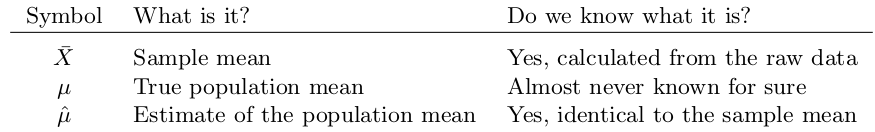

**Estimating the population standard deviation**<br> 

If you have a sample size of 1, the sample std is 0- but it would be insane to use this as an estimate for the population.<br> 

If you have a sample size of 2, you can take a shot at it, but still not very good.

Sampling distribution of the standard deviation for IQ scores: 

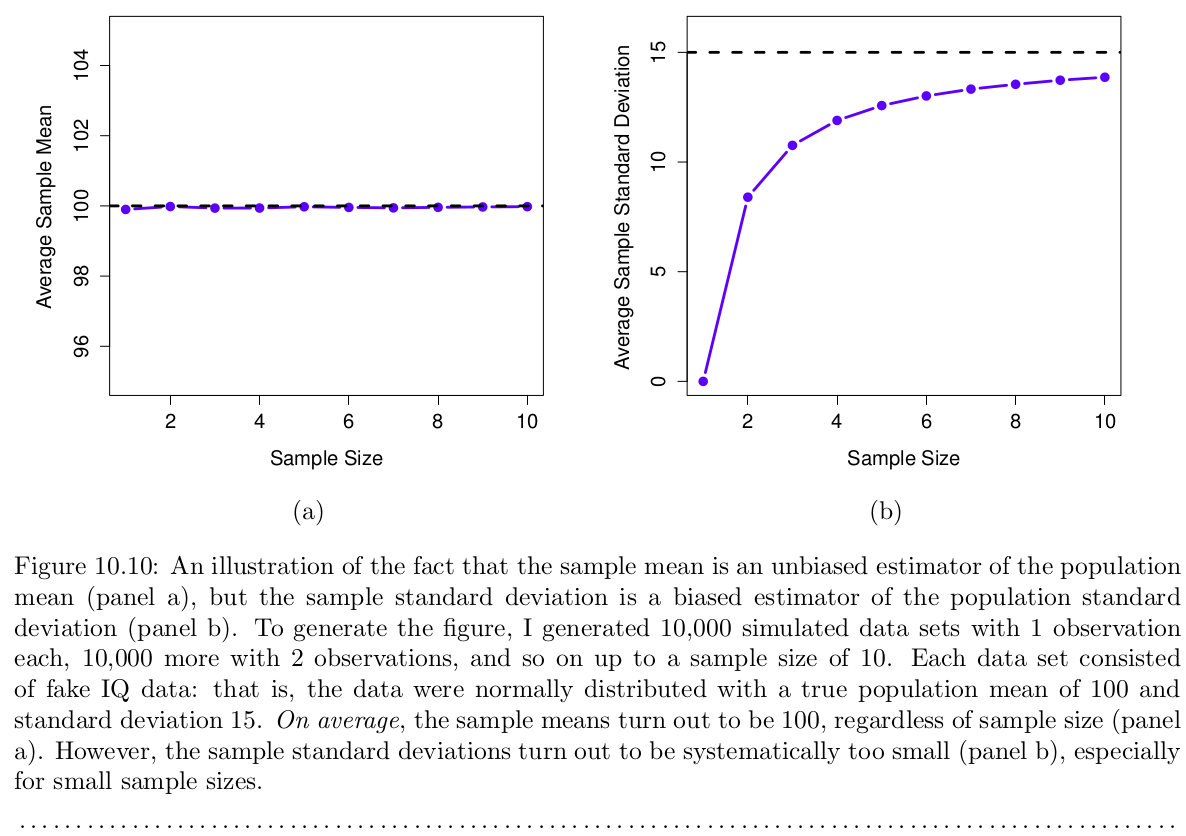

mean is an **unbiased estimator**<br> 

sample standard deviation is a **biased estimator** since its systematically smaller than the population standard deviation<br> 

To fix the standard deviation issue, divide by $N-1$, not $N$. This gives an unbiased estimator of the population standard deviation. this is what `var()` and `sd()` actually calculate.<br> 

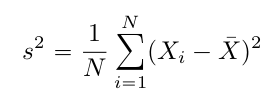

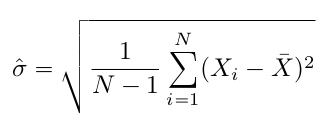

- $s$ = sample statistic
- $\hat{\sigma}$ = estimator

Note: $\hat{\sigma}^2$ is an unbiased estimator for $\sigma^2$, but $\hat{\sigma}$ is NOT an unbiased estimator for $\sigma$ because of the square root (https://en.wikipedia.org/wiki/Unbiased_estimation_of_standard_deviation), but the bias is so small that it doesn't matter.<br> 

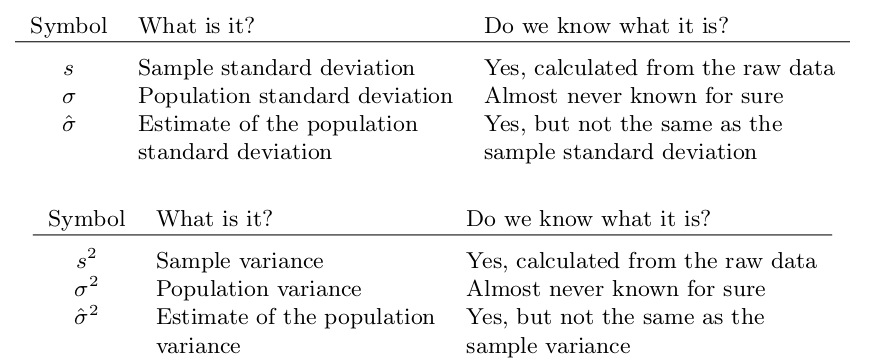

## Estimating a confidence interval

**Confidence interval** - a way of quantifying the degree of certainty we have a in a guess. <br> 

use qnorm() to get 2.5th and 97.5th percentiles of normal distribution (95% confidence interval)

In [3]:
qnorm(p=c(0.025, 0.975))

[1] -1.959964  1.959964

$
CI_{95} = \bar{X} \pm (1.96 \times\frac{\sigma}{\sqrt{N}})
$

**A slight mistake in the formula**<br> 

We don't actually know the true population standard deviation!

Since we don't know the true value for $\sigma$, we need to use $\hat{\sigma}$, but we need to use the quantiles of a t-distribution (which depends on sample size)

When we use the t-distribution, we get wider confidence intervals because our estimate of the population standard deviation might be wrong, and the t-distribution accounts for that<br> 

In [4]:
# sample size of 10000
N <- 10000
qt(p=0.975, df=N-1)

[1] 1.960201

very close to normal!

In [5]:
# sample size of 10
N <- 10
qt(p=0.975, df=N-1)

[1] 2.262157

much wider with fewer samples

**Interpreting a confidence interval**

It's not completely correct to say something like "there is a 95% probability that the true mean lies inside the confidence interval". This starts to rely on personal beliefs about the population mean (which is Bayesian). 

CIs are frequentist tools, so this is not an appropriate interpretation. <br> 
correct interpretation: If we replicated the experiment over and overand computed a 95% confidence interval each time, then 95% of those intervals will contain the true mean.<br> 

**95% of confidence intervals constructed using this procedure should contain the true population mean**. 

critical difference: The Bayesian claim makes a probability statement about the population mean, which is not allowed under the frequentist interpretation because you can't replicate a population. <br> 

for a frequentist: no the population mean is fixed and no probabilistic claims can be made about it.<br> 

The frequentist can talk about the probability that a confidence interval contains the true mean, but can't talk about th eprobability that the true mean falls within the confidence interval. <br> 

bayesian alternative to CIs: credible intervals<br> 

**Calculating confidence intervals in R**

no simple function for CIs for the mean. Use ciMean() in lsr

In [6]:
library("lsr")

In [7]:
load("afl24.Rdata")

In [8]:
who()

   -- Name --   -- Class --   -- Size --
   afl          data.frame    4296 x 12 
   IQ           numeric       10000     
   IQ.1         numeric       5         
   IQ.2         numeric       5         
   N            numeric       1         

In [9]:
ciMean(x=afl$attendance)

2.5%,97.5%
31597.32,32593.12


**Plotting confidence intervals in R**

In [12]:
install.packages('sciplot')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [13]:
install.packages('gplots')

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [15]:
library(sciplot) # bargraph.CI(), lineplot.CI()
library(gplots)  # plotmeans()
library(lsr)     # ciMean()


Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



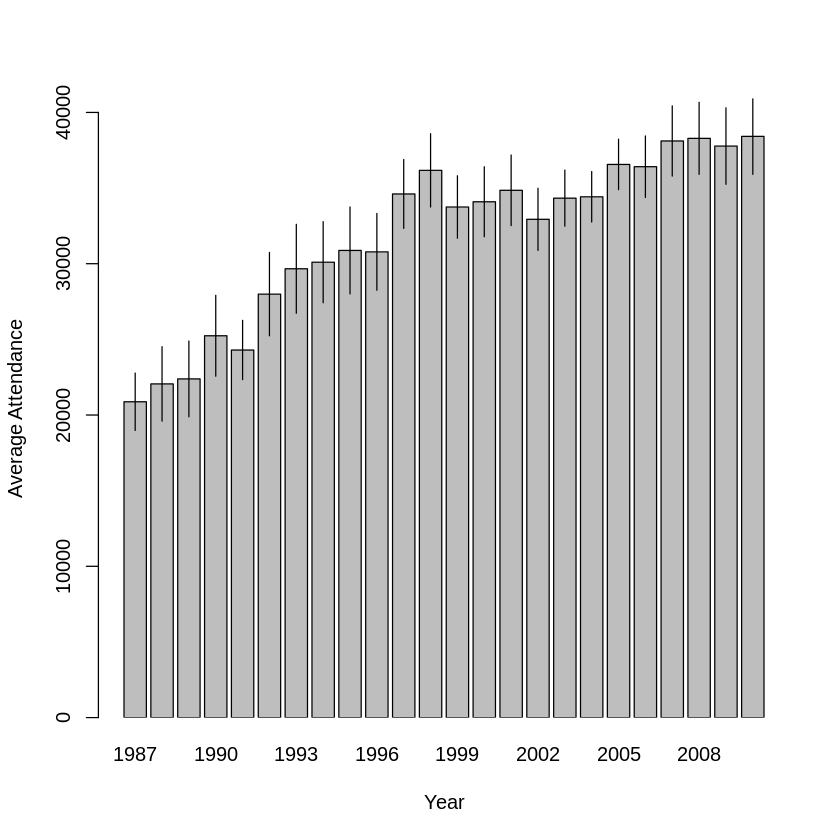

In [17]:
bargraph.CI(x.factor=year,           # grouping variable
           response=attendance,      # outcome variable
           data=afl,                 # data frame with the varialbes
           ci.fun=ciMean,            # name of function to calculate CIs
           xlab="Year",              # x-axis label
           ylab="Average Attendance" # y-axis label
           )

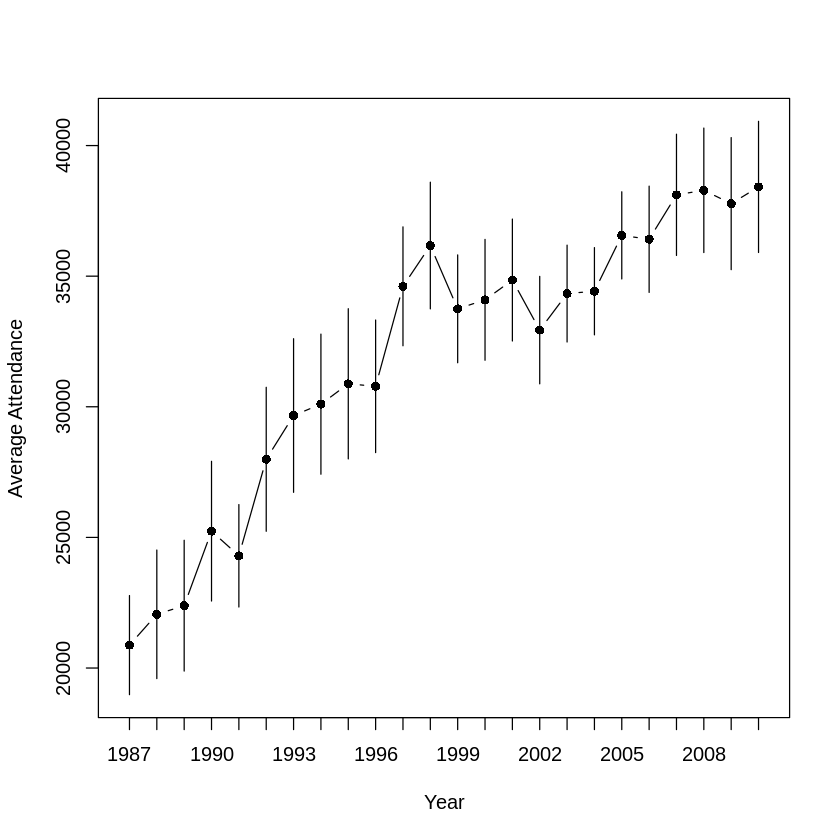

In [18]:
lineplot.CI(x.factor=year,           # grouping variable
           response=attendance,      # outcome variable
           data=afl,                 # data frame with the varialbes
           ci.fun=ciMean,            # name of function to calculate CIs
           xlab="Year",              # x-axis label
           ylab="Average Attendance" # y-axis label
           )

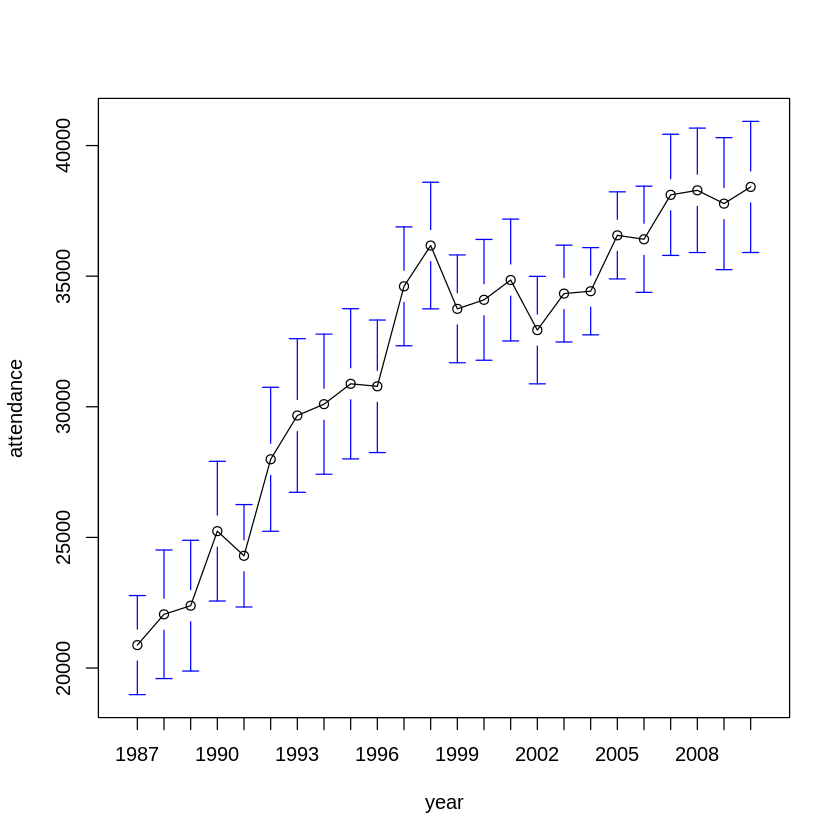

In [20]:
plotmeans(formula = attendance ~ year,
         data=afl,
         n.label=FALSE)